First, we import the needed the Python packages for exploring, as well as visualising the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Missing colon in file '/Users/christianelorenz/.matplotlib/matplotlibrc', line 1 ('cat ~/.matplotlib/matplotlibrc')


Next, we read in the full dataset. 

In [2]:
data=pd.read_csv("../../trainset_full.csv")

In order to be able to see all the entries in our tables, we set the following Pandas option:

In [4]:
pd.set_option('display.max_columns', None)

We choose the plotting style ggplot:

In [5]:
plt.style.use("ggplot")

Now, we would like to get a first feeling for the data. For this, we can use several Pandas functions describe, info and head. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367190 entries, 0 to 1367189
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1367190 non-null  int64  
 1   turbine_id          1367190 non-null  int64  
 2   measured_at         1367190 non-null  object 
 3   wind_speed          1367190 non-null  float64
 4   power               1367190 non-null  float64
 5   nacelle_direction   1367190 non-null  float64
 6   wind_direction      1367190 non-null  float64
 7   rotor_speed         1367190 non-null  float64
 8   generator_speed     1367190 non-null  float64
 9   temp_environment    1367190 non-null  int64  
 10  temp_hydraulic_oil  1367190 non-null  int64  
 11  temp_gear_bearing   1367190 non-null  int64  
 12  cosphi              1367190 non-null  float64
 13  blade_angle_avg     1367190 non-null  float64
 14  hydraulic_pressure  1367190 non-null  float64
 15  park_id        

We see that there are 17 different columns. The target variable will be the attribute "error_category". In total, we have 1367190 rows. In addition, we see here which variables have numerical attributes, and which have categorical attributes. Next, we use the Pandas describe function for all 17 columns in the table, so we also include here the categorical attributes. 

In [13]:
data.describe(include="all")

index    turbine_id                measured_at    wind_speed  \
count   1.367190e+06  1.367190e+06                    1367190  1.367190e+06   
unique           NaN           NaN                     122516           NaN   
top              NaN           NaN  2020-01-01 00:00:00+00:00           NaN   
freq             NaN           NaN                         13           NaN   
mean    6.835945e+05  2.244315e+01                        NaN  4.660850e-01   
std     3.946739e+05  5.554621e+00                        NaN  2.133459e-01   
min     0.000000e+00  1.100000e+01                        NaN  7.692308e-03   
25%     3.417972e+05  2.100000e+01                        NaN  3.083333e-01   
50%     6.835945e+05  2.400000e+01                        NaN  4.384615e-01   
75%     1.025392e+06  2.700000e+01                        NaN  5.846154e-01   
max     1.367189e+06  2.900000e+01                        NaN  1.950000e+00   

               power  nacelle_direction  wind_direction   rotor_speed  \
count   1.367190e+06       1.367190e+06    1.367190e+06  1.367190e+06   
unique           NaN                NaN             NaN           NaN   
top              NaN                NaN             NaN           NaN   
freq             NaN                NaN             NaN           NaN   
mean    2.386451e-01       1.887500e+02    1.882401e+02  6.568465e-01   
std     2.782844e-01       9.951697e+01    9.944392e+01  3.002719e-01   
min    -1.770000e-02       0.000000e+00    0.000000e+00  0.000000e+00   
25%     2.675000e-02       9.180000e+01    9.130000e+01  5.250000e-01   
50%     1.310606e-01       2.120000e+02    2.116000e+02  6.750000e-01   
75%     3.505379e-01       2.603000e+02    2.598000e+02  8.916667e-01   
max     1.001242e+00       3.599000e+02    3.599000e+02  1.116667e+00   

        generator_speed  temp_environment  temp_hydraulic_oil  \
count      1.367190e+06      1.367190e+06        1.367190e+06   
unique              NaN               NaN                 NaN   
top                 NaN               NaN                 NaN   
freq                NaN               NaN                 NaN   
mean       5.834968e-01      1.420441e+01        3.969864e+01   
std        2.670637e-01      6.904299e+00        7.078892e+00   
min        0.000000e+00     -1.100000e+01        5.000000e+00   
25%        4.669333e-01      9.000000e+00        3.900000e+01   
50%        5.961333e-01      1.400000e+01        4.200000e+01   
75%        7.904000e-01      1.900000e+01        4.400000e+01   
max        9.981333e-01      4.100000e+01        8.900000e+01   

        temp_gear_bearing        cosphi  blade_angle_avg  hydraulic_pressure  \
count        1.367190e+06  1.367190e+06     1.367190e+06        1.367190e+06   
unique                NaN           NaN              NaN                 NaN   
top                   NaN           NaN              NaN                 NaN   
freq                  NaN           NaN              NaN                 NaN   
mean         5.804010e+01  6.769930e-01     4.637889e+00        2.349338e+02   
std          1.208863e+01  6.068740e-01     1.845868e+01        2.577628e+01   
min          6.000000e+00 -1.000000e+00    -5.000000e+00       -2.000000e+00   
25%          5.000000e+01  7.700000e-01    -2.800000e+00        2.467000e+02   
50%          6.000000e+01  1.000000e+00    -2.100000e+00        2.471000e+02   
75%          6.700000e+01  1.000000e+00     8.000000e-01        2.472000e+02   
max          8.600000e+01  1.000000e+00     9.030000e+01        2.617000e+02   

             park_id error_category  
count   1.367190e+06        1367190  
unique           NaN             18  
top              NaN       NO_ERROR  
freq             NaN        1272609  
mean    1.796216e+00            NaN  
std     4.028107e-01            NaN  
min     1.000000e+00            NaN  
25%     2.000000e+00            NaN  
50%     2.000000e+00            NaN  
75%     2.000000e+00            NaN  
max     2.000000e+00         

We check for missing values for the numerical attributes.

In [16]:
data.isnull().sum()

index                 0
turbine_id            0
measured_at           0
wind_speed            0
power                 0
nacelle_direction     0
wind_direction        0
rotor_speed           0
generator_speed       0
temp_environment      0
temp_hydraulic_oil    0
temp_gear_bearing     0
cosphi                0
blade_angle_avg       0
hydraulic_pressure    0
park_id               0
error_category        0
dtype: int64

So there are no missing values here for the numerical attributes. We also output here the first ten entries of the dataset.

In [17]:
data.head(10)

index  turbine_id                measured_at  wind_speed    power  \
0      0          11  2020-01-01 00:00:00+00:00    0.433333  0.12125   
1      1          11  2020-01-01 00:10:00+00:00    0.458333  0.13875   
2      2          11  2020-01-01 00:20:00+00:00    0.508333  0.18295   
3      3          11  2020-01-01 00:30:00+00:00    0.525000  0.21810   
4      4          11  2020-01-01 00:40:00+00:00    0.541667  0.23430   
5      5          11  2020-01-01 00:50:00+00:00    0.533333  0.22045   
6      6          11  2020-01-01 01:00:00+00:00    0.525000  0.23160   
7      7          11  2020-01-01 01:10:00+00:00    0.500000  0.18755   
8      8          11  2020-01-01 01:20:00+00:00    0.458333  0.14185   
9      9          11  2020-01-01 01:30:00+00:00    0.458333  0.13290   

   nacelle_direction  wind_direction  rotor_speed  generator_speed  \
0              266.0           266.3     0.677852         0.569444   
1              266.6           267.0     0.704698         0.591766   
2              270.7           269.4     0.771812         0.647321   
3              272.1           272.7     0.805369         0.676091   
4              279.5           281.1     0.832215         0.700397   
5              276.0           278.7     0.812081         0.679563   
6              276.0           273.9     0.805369         0.678075   
7              276.0           273.3     0.765101         0.644345   
8              276.0           278.4     0.711409         0.597222   
9              275.5           271.2     0.704698         0.594246   

   temp_environment  temp_hydraulic_oil  temp_gear_bearing  cosphi  \
0                 5                  20                 32    0.85   
1                 5                  20                 33    0.88   
2                 5                  20                 34    0.92   
3                 5                  20                 38    0.94   
4                 5                  20                 41    0.95   
5                 5                  20                 39    0.94   
6                 5                  20                 38    0.95   
7                 5                  20                 37    0.93   
8                 5                  20                 37    0.87   
9                 5                  20                 36    0.86   

   blade_angle_avg  hydraulic_pressure  park_id error_category  
0             -1.9               189.2        1       NO_ERROR  
1             -2.0               189.5        1       NO_ERROR  
2             -2.0               190.1        1       NO_ERROR  
3             -2.0               190.0        1       NO_ERROR  
4             -2.0               189.9        1       NO_ERROR  
5             -2.0               190.1        1       NO_ERROR  
6             -1.9               189.8        1       NO_ERROR  
7             -1.9               190.2        1       NO_ERROR  
8             -1.9               189.7        1       NO_ERROR  
9             -1.9               190.0        1       NO_ERROR

How many distinct wind turbines are there?

In [20]:
data["turbine_id"].value_counts()

24    121509
23    121508
22    121495
25    121493
27    121454
21    121308
26    121146
29    120979
28    117686
13     69703
14     69691
11     69613
12     69605
Name: turbine_id, dtype: int64

So there are 13 different turbines. 

In which wind parks are the different turbines located?

In [22]:
data.groupby(by="park_id").turbine_id.value_counts()

park_id  turbine_id
1        13             69703
         14             69691
         11             69613
         12             69605
2        24            121509
         23            121508
         22            121495
         25            121493
         27            121454
         21            121308
         26            121146
         29            120979
         28            117686
Name: turbine_id, dtype: int64

There are two different wind parks. 

As a next step, we would like to investigate further the error categories. For this, we first output the different error categories, and how many data points there are for each one.

In [18]:
data["error_category"].value_counts()

NO_ERROR    1272609
ERROR=12      47724
ERROR=17      21651
ERROR=3       10224
ERROR=5        4893
ERROR=19       3743
ERROR=24       1771
ERROR=28       1494
ERROR=8        1081
ERROR=20        787
ERROR=31        495
ERROR=30        409
ERROR=22        141
ERROR=25        108
ERROR=7          32
ERROR=27         22
ERROR=29          4
ERROR=23          2
Name: error_category, dtype: int64

The majority of data points have no errors (1272609). There are 17 different categories of errors, the "no error" category not counted.

Next, we analyse which features might be particularly suited to predict the error categories.

First, we plot histograms for the the features:

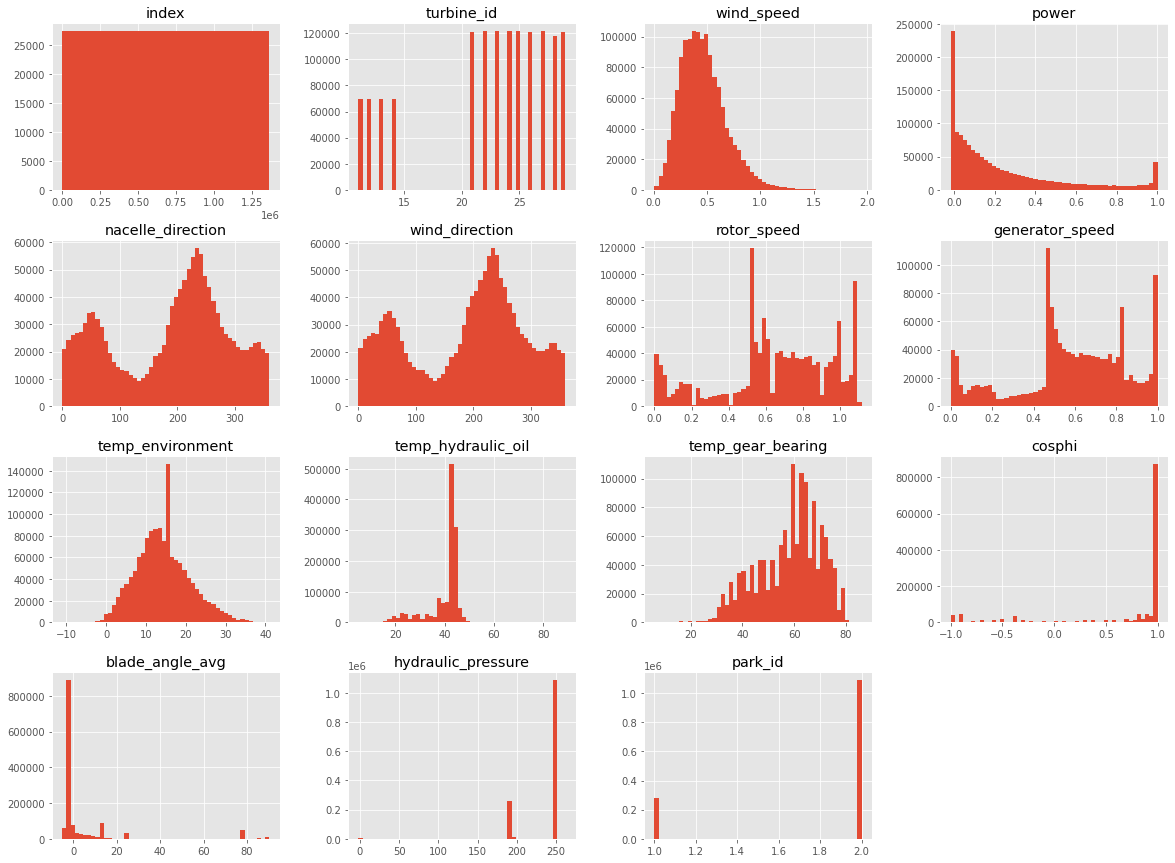

In [25]:
data.hist(bins=50,figsize=(20,15))

We can create boxplots for the numerical features with respect to the different error categories:

<AxesSubplot:xlabel='error_category', ylabel='wind_speed'>

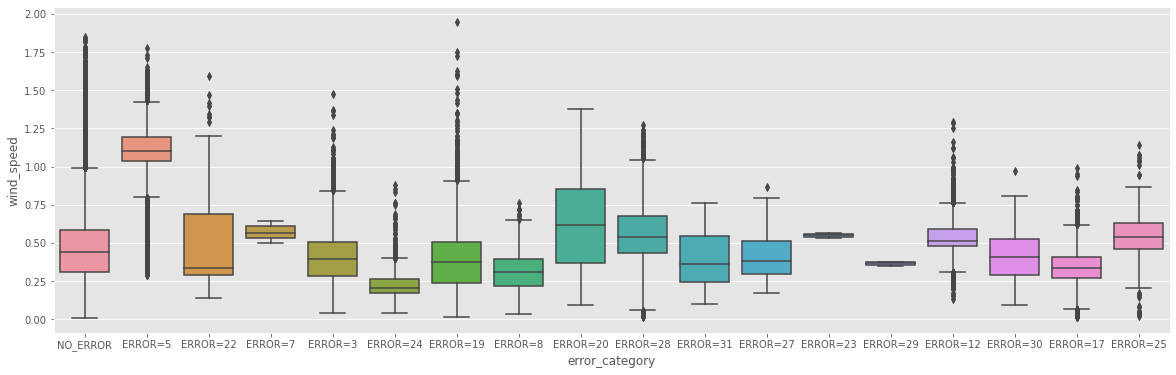

In [26]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="wind_speed", data=data)

<AxesSubplot:xlabel='error_category', ylabel='power'>

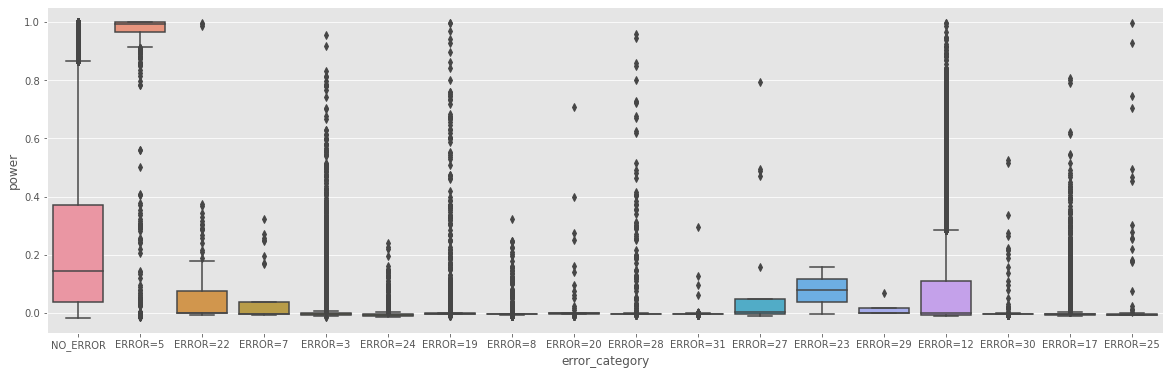

In [27]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="power", data=data)

<AxesSubplot:xlabel='error_category', ylabel='nacelle_direction'>

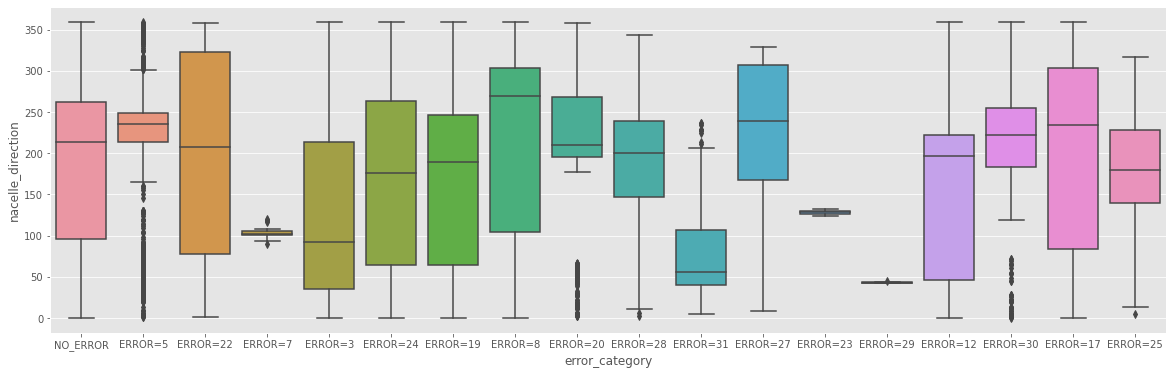

In [28]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="nacelle_direction", data=data)

<AxesSubplot:xlabel='error_category', ylabel='wind_direction'>

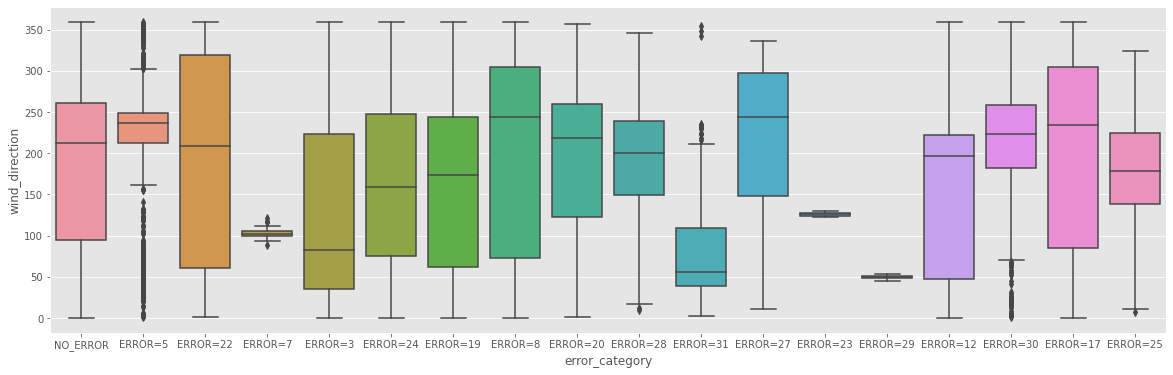

In [29]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="wind_direction", data=data)

<AxesSubplot:xlabel='error_category', ylabel='rotor_speed'>

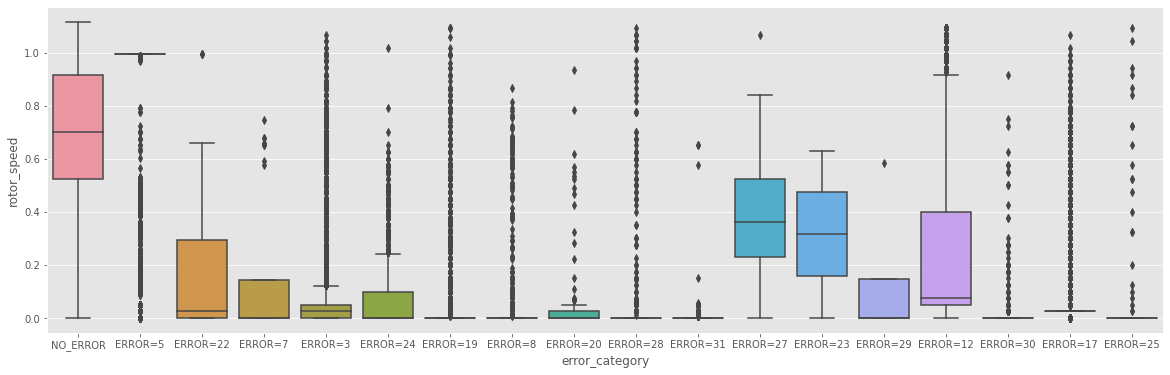

In [30]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="rotor_speed", data=data)

<AxesSubplot:xlabel='error_category', ylabel='generator_speed'>

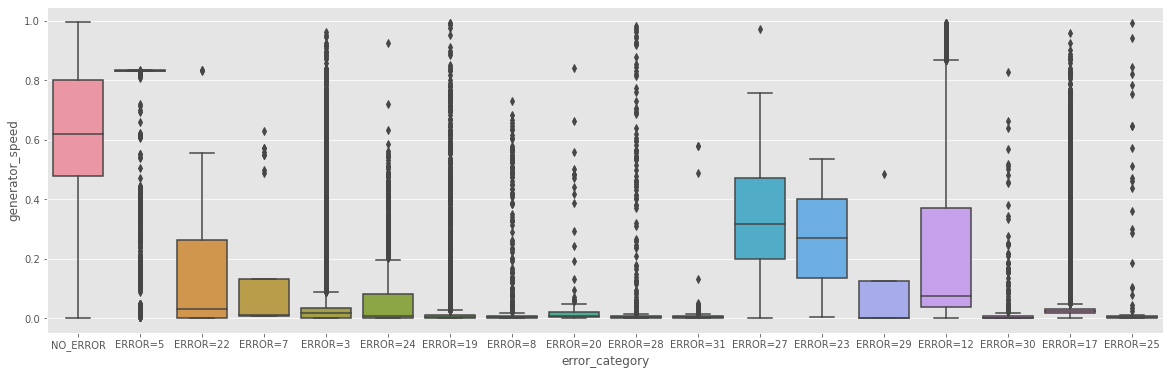

In [31]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="generator_speed", data=data)

<AxesSubplot:xlabel='error_category', ylabel='cosphi'>

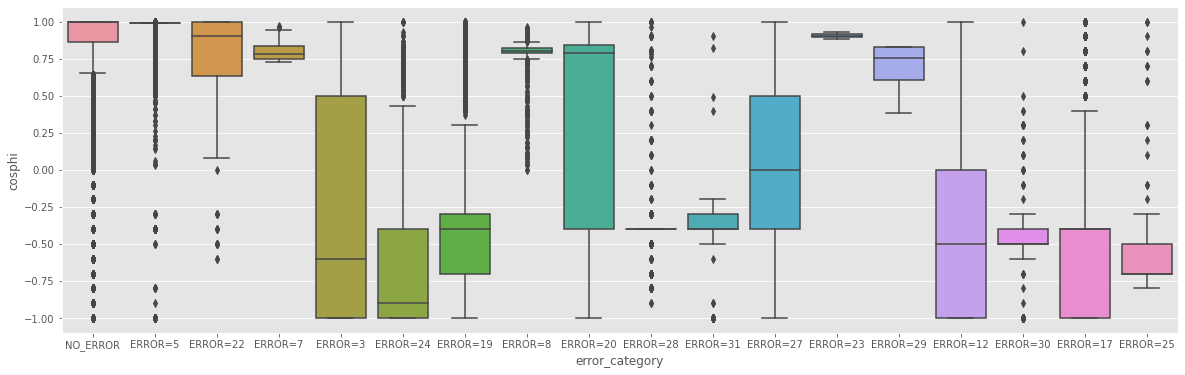

In [32]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="cosphi", data=data)

<AxesSubplot:xlabel='error_category', ylabel='blade_angle_avg'>

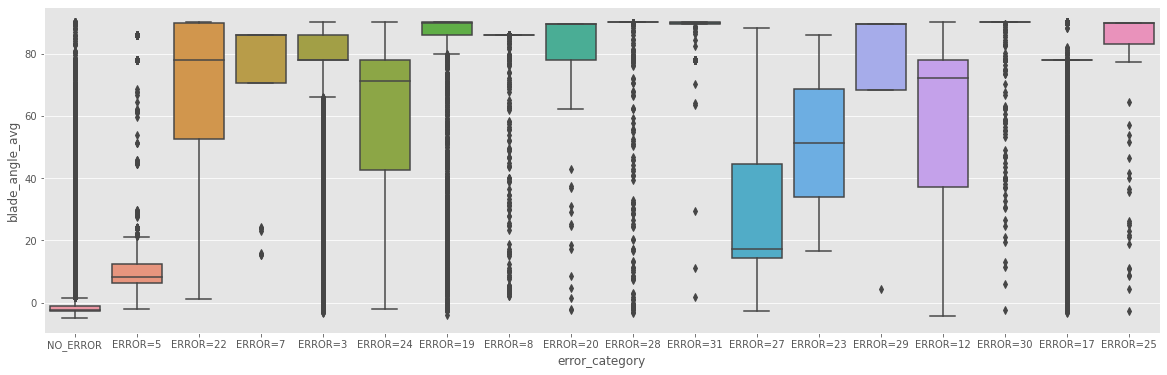

In [33]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="blade_angle_avg", data=data)

<AxesSubplot:xlabel='error_category', ylabel='hydraulic_pressure'>

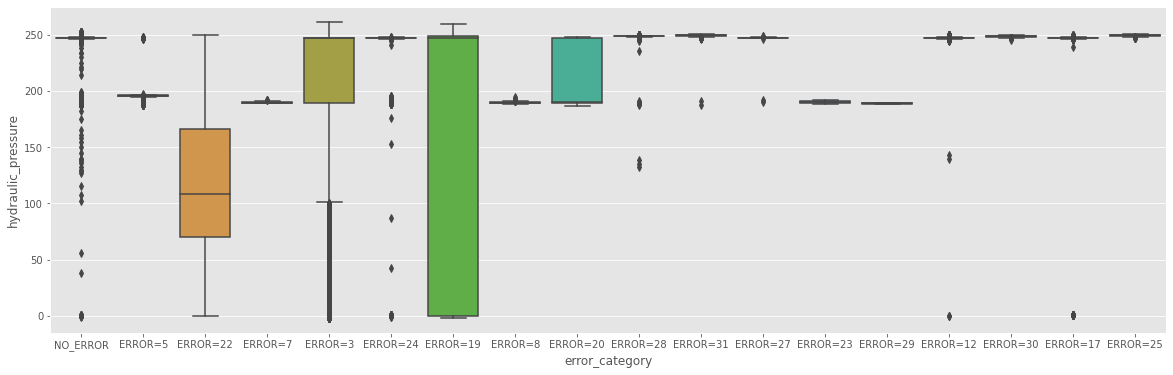

In [34]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.boxplot(x="error_category", y="hydraulic_pressure", data=data)

Here, it looks like that the attribute "generator_speed" is very similar to "rotor_speed", this might mean we can drop one of these as features. "ERROR_5" seems to be connected to high "power", and high "wind_speed". If there is no error, "blade_angle_avg" tends to be low, if it is high, this can indicate an error. Similarly, if "cosphi" is low, this can also indicate an error. In total, promising features seem to be "blade_angle_avg", "hydraulic_pressure", "cosphi", "wind_speed", "rotor_speed", "power". For wind_direction and nacelle_direction it is less clear.

It is also interesting to see distribution plots for some of the numerical features, depending on whether the datapoints have "NO ERROR" or have an error. For this purpose, we split the data into two groups.

In [37]:
data_errors= data[data.error_category != "NO_ERROR"]
data_noerrors = data[data.error_category == "NO_ERROR"]

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Windspeeds')

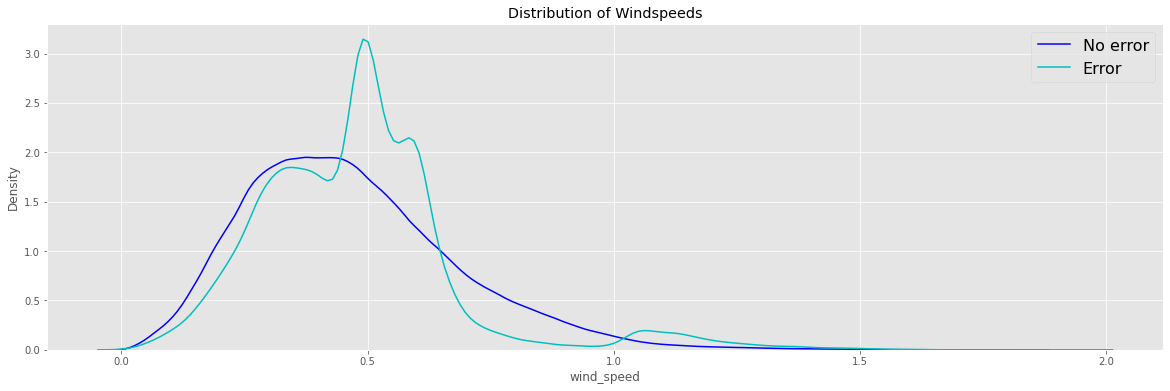

In [38]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.wind_speed, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.wind_speed, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of Windspeeds")

Here, we see that data entries with an error often have a wind_speed peak around 0.5.

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blade_angle_avg')

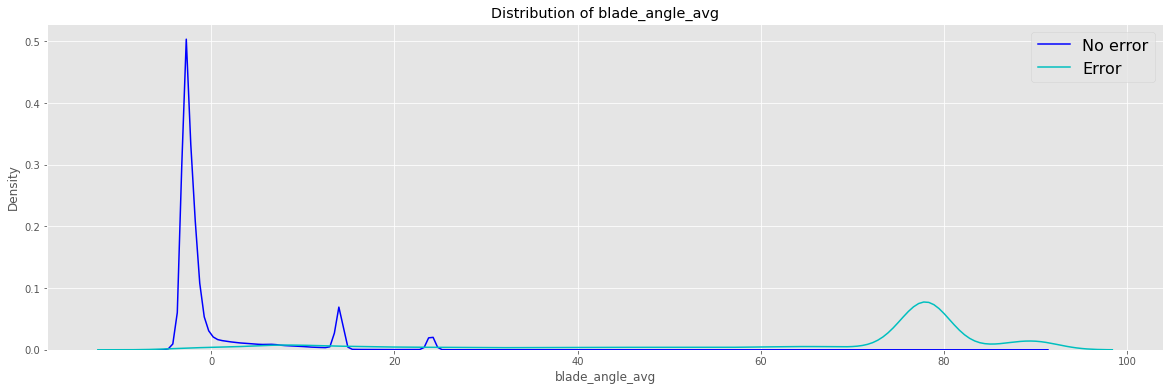

In [39]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.blade_angle_avg, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.blade_angle_avg, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of blade_angle_avg")

Similarly, blade_angle_avg at around 75 seem to generate an error.

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of cosphi')

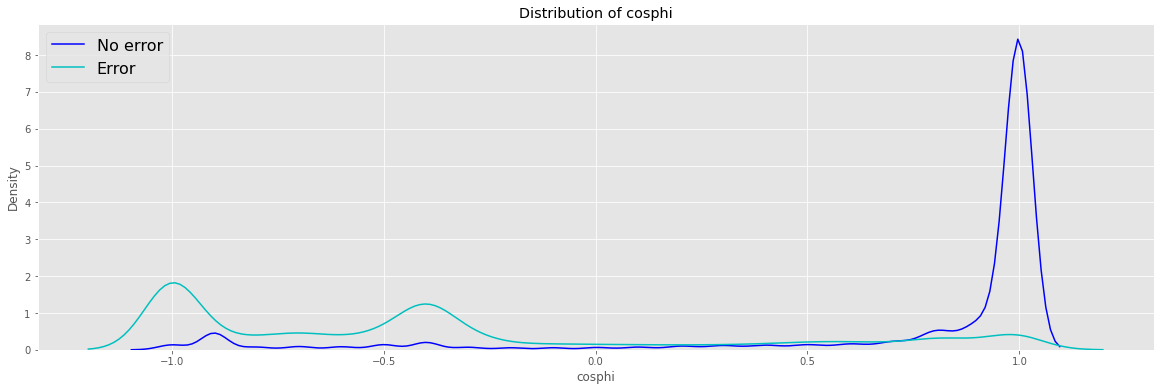

In [40]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.cosphi, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.cosphi, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of cosphi")

Here, "cosphi" tends to have small (negative) values if there is an error.

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of hydraulic_pressure')

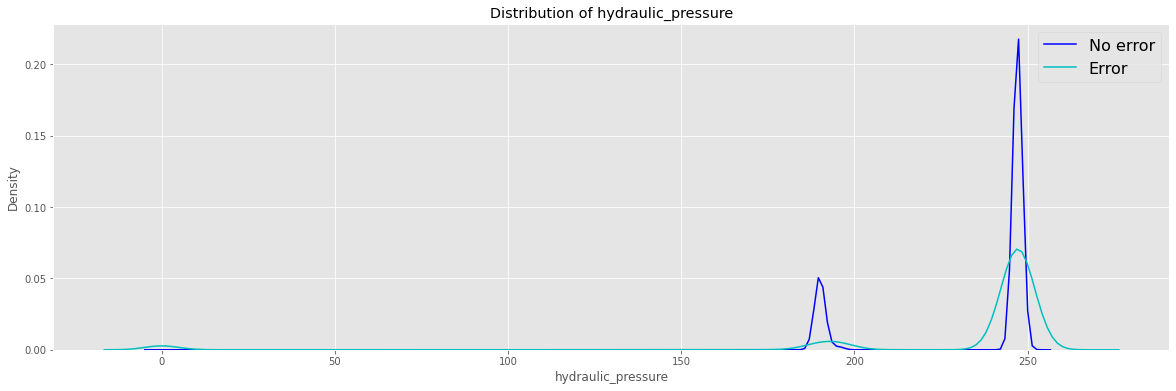

In [41]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.hydraulic_pressure, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.hydraulic_pressure, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of hydraulic_pressure")

These distribution match relatively well.

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of rotor_speed')

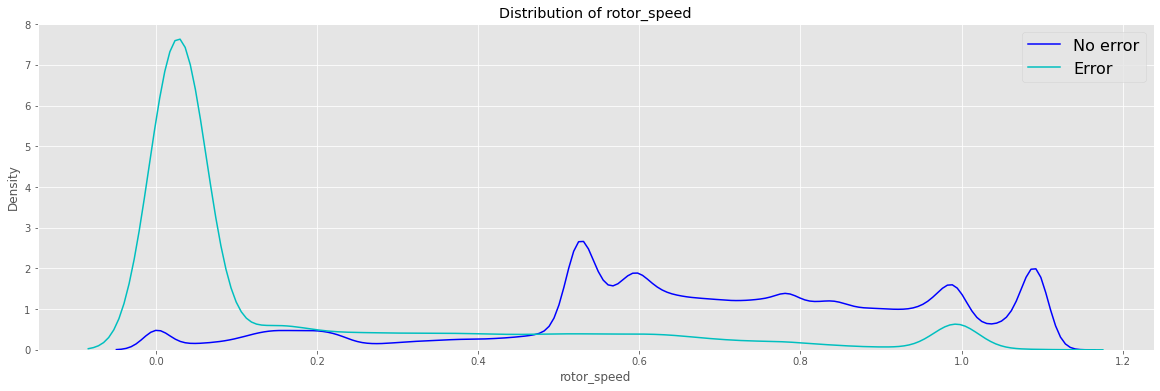

In [42]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.rotor_speed, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.rotor_speed, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of rotor_speed")

If there is an error, the rotor speeds tends to go to zero.

/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christianelorenz/Documents/Career development/env3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of power')

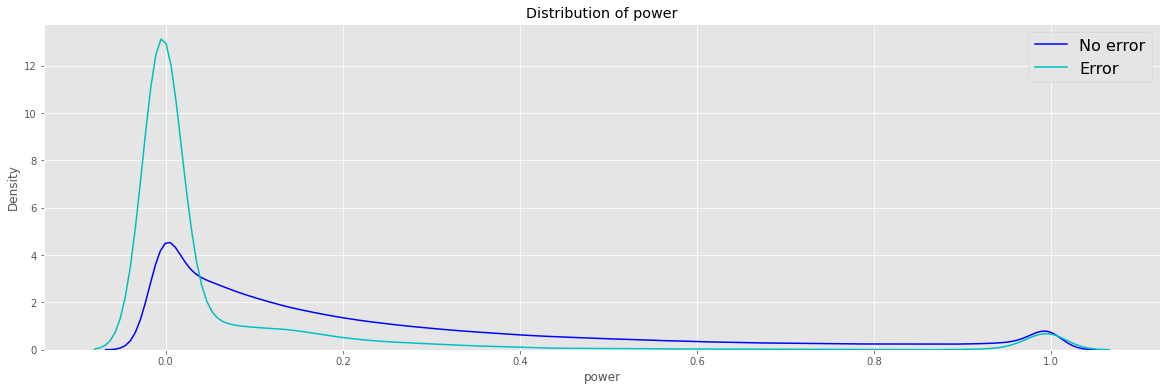

In [43]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
ax1=sns.distplot(data_noerrors.power, hist=False, color="b", label="No error")
ax2=sns.distplot(data_errors.power, hist=False, color="c", label="Error",ax=ax1)
ax2.legend(fontsize=16)
plt.title("Distribution of power")

Similarly, power goes to zero if there is an error.

We can also look for correlations in the data. For this, we split the data entries into features (X_train) and into the target variable (y_train_full and y_train). The latter is for the case where we are only interested in whether there has any error occurred or none. 

In [44]:
data["Error"]=data.error_category != "NO_ERROR"

In [46]:
X_train=data[['index', 'turbine_id', 'measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure', 'park_id']]
y_train=data.Error
y_train_full=data.error_category

We create a scatter matrix of the features: 

array([[<AxesSubplot:xlabel='index', ylabel='index'>,
        <AxesSubplot:xlabel='turbine_id', ylabel='index'>,
        <AxesSubplot:xlabel='wind_speed', ylabel='index'>,
        <AxesSubplot:xlabel='power', ylabel='index'>,
        <AxesSubplot:xlabel='nacelle_direction', ylabel='index'>,
        <AxesSubplot:xlabel='wind_direction', ylabel='index'>,
        <AxesSubplot:xlabel='rotor_speed', ylabel='index'>,
        <AxesSubplot:xlabel='generator_speed', ylabel='index'>,
        <AxesSubplot:xlabel='temp_environment', ylabel='index'>,
        <AxesSubplot:xlabel='temp_hydraulic_oil', ylabel='index'>,
        <AxesSubplot:xlabel='temp_gear_bearing', ylabel='index'>,
        <AxesSubplot:xlabel='cosphi', ylabel='index'>,
        <AxesSubplot:xlabel='blade_angle_avg', ylabel='index'>,
        <AxesSubplot:xlabel='hydraulic_pressure', ylabel='index'>,
        <AxesSubplot:xlabel='park_id', ylabel='index'>],
       [<AxesSubplot:xlabel='index', ylabel='turbine_id'>,
        <AxesSubplot:

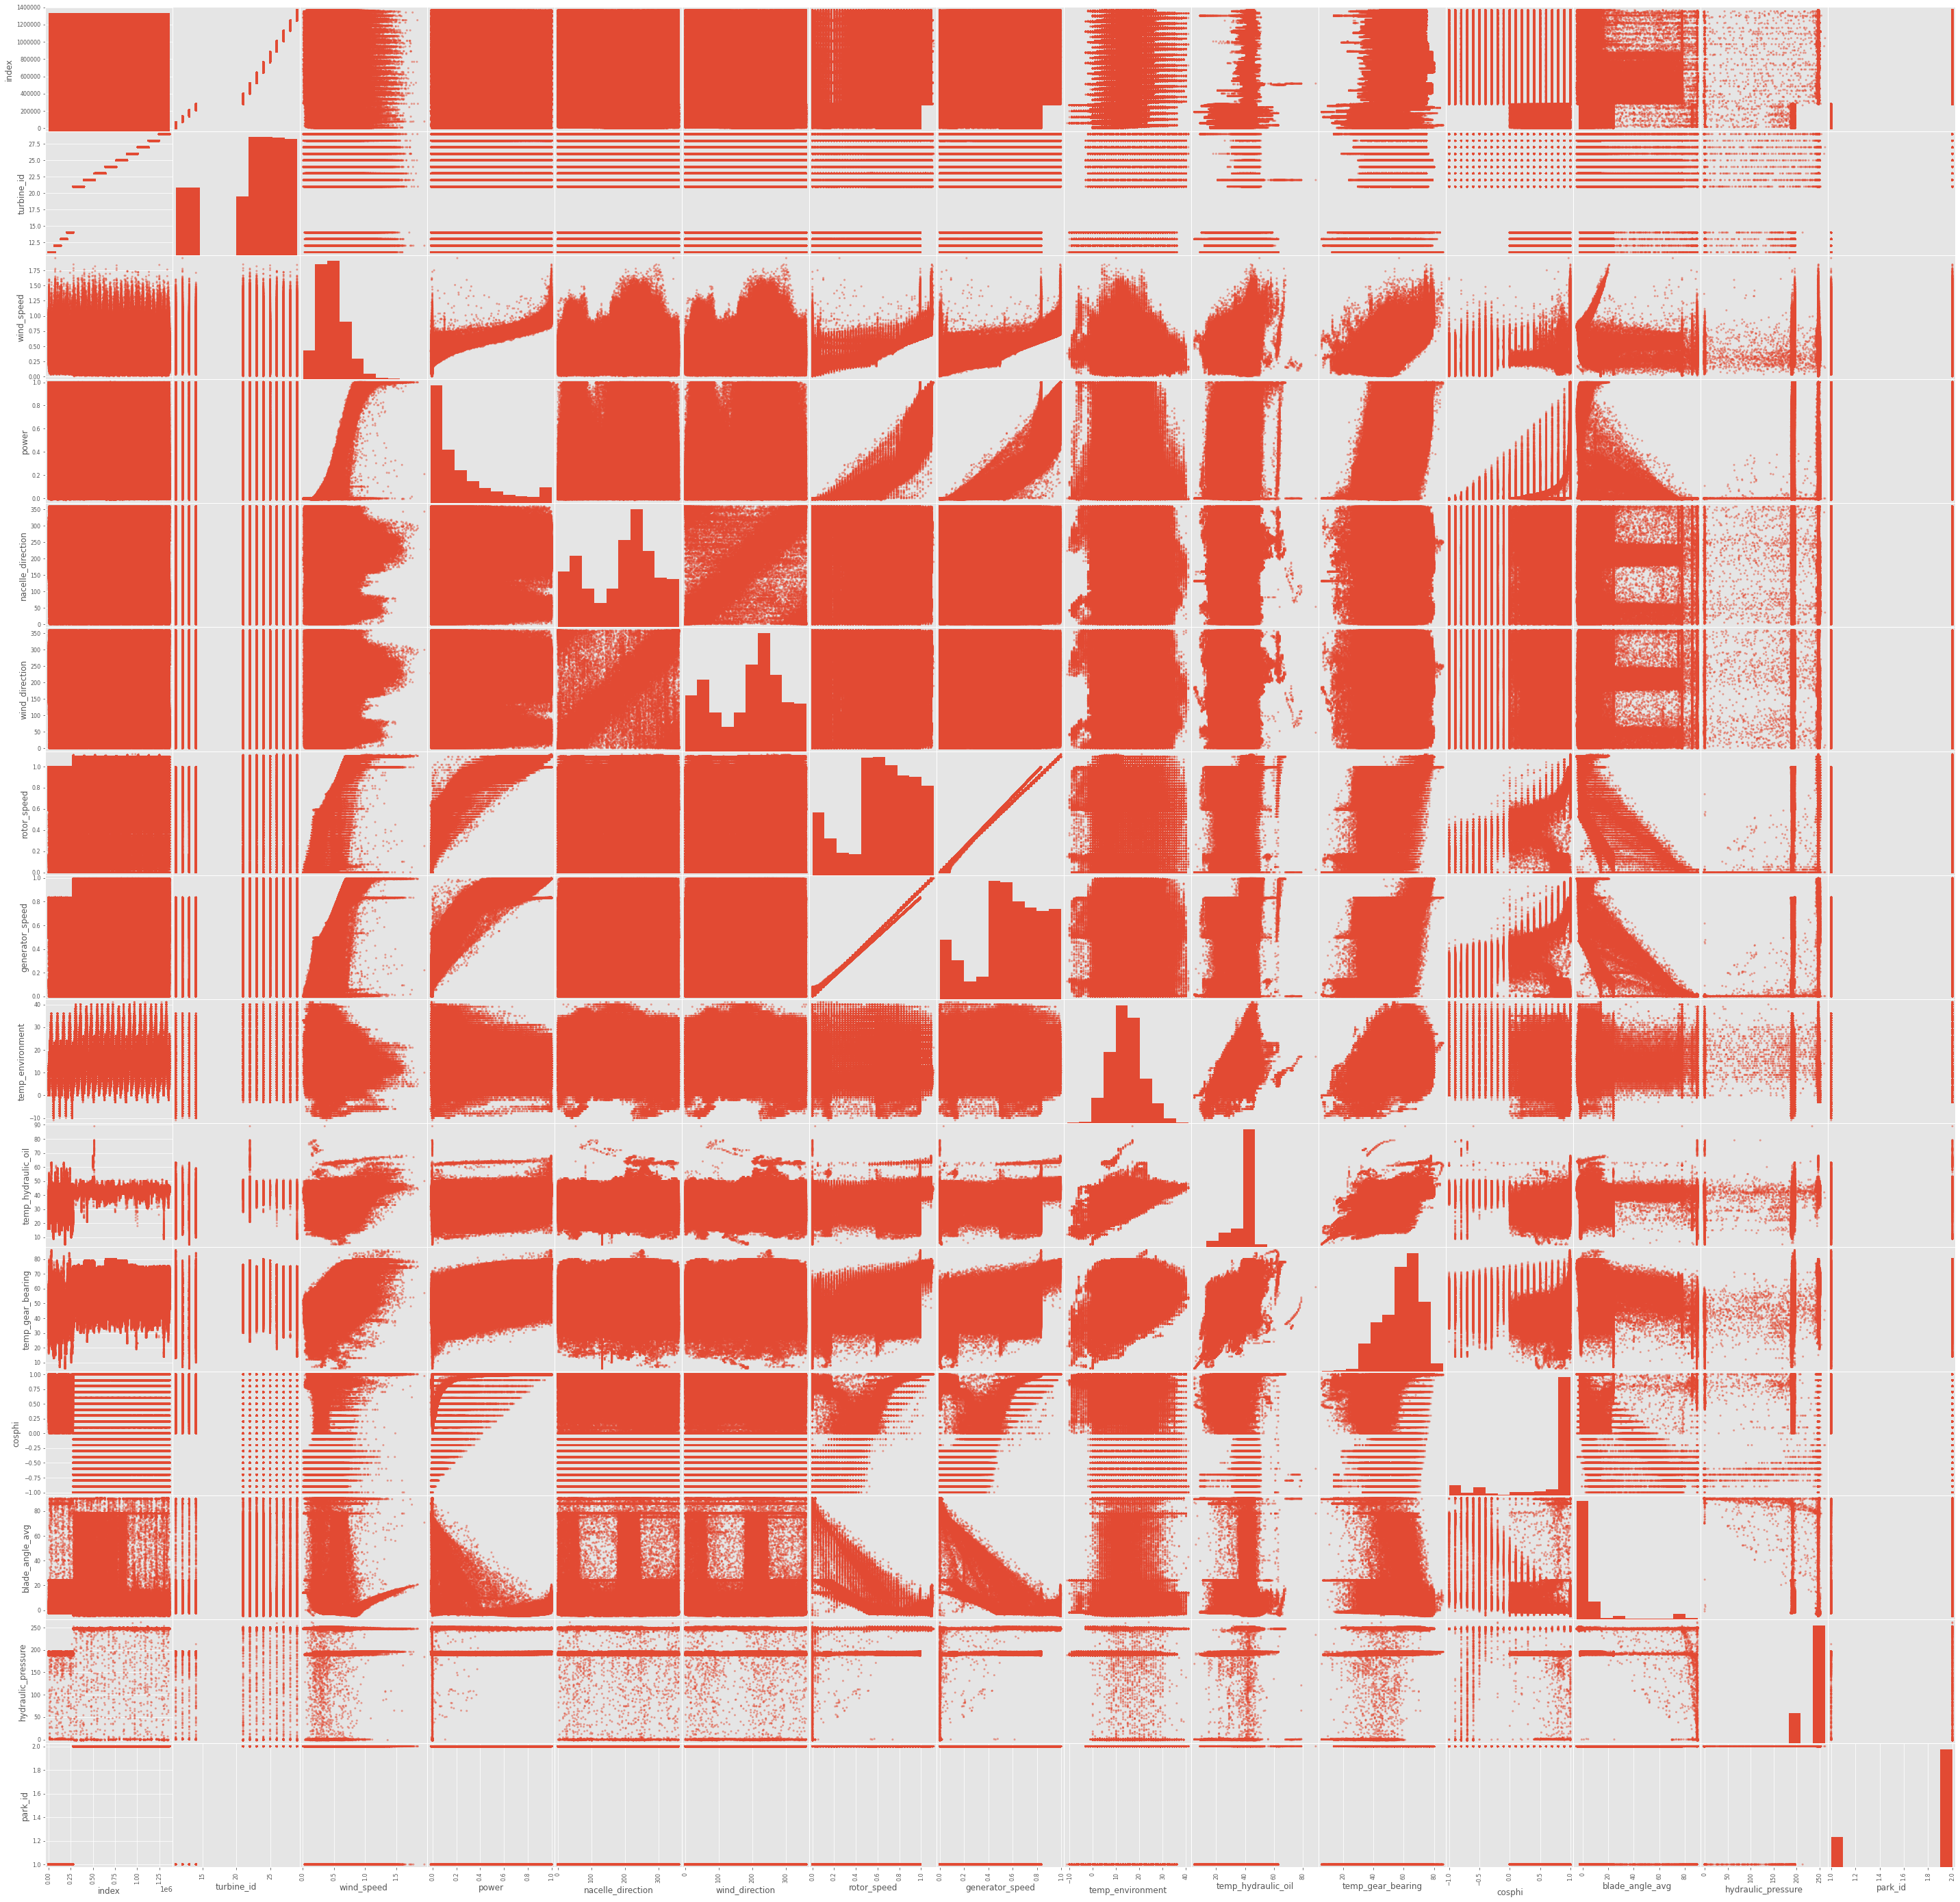

In [47]:
pd.plotting.scatter_matrix(X_train, figsize=(50, 50))

We look for correlations: 

In [48]:
#look for correlations
corrs=X_train.corrwith(y_train)
corrs.sort_values(ascending=False)

blade_angle_avg       0.864546
park_id               0.068881
temp_hydraulic_oil    0.057457
turbine_id            0.023719
wind_speed            0.016415
temp_environment      0.014123
index                -0.015161
hydraulic_pressure   -0.023082
wind_direction       -0.058649
nacelle_direction    -0.059448
temp_gear_bearing    -0.152136
power                -0.156739
rotor_speed          -0.427679
generator_speed      -0.427837
cosphi               -0.464427
dtype: float64

We see here that "blade_angle_avg" is most correlated with whether there is an error or not.

We can also create a heatmap of the correlations:

<AxesSubplot:>

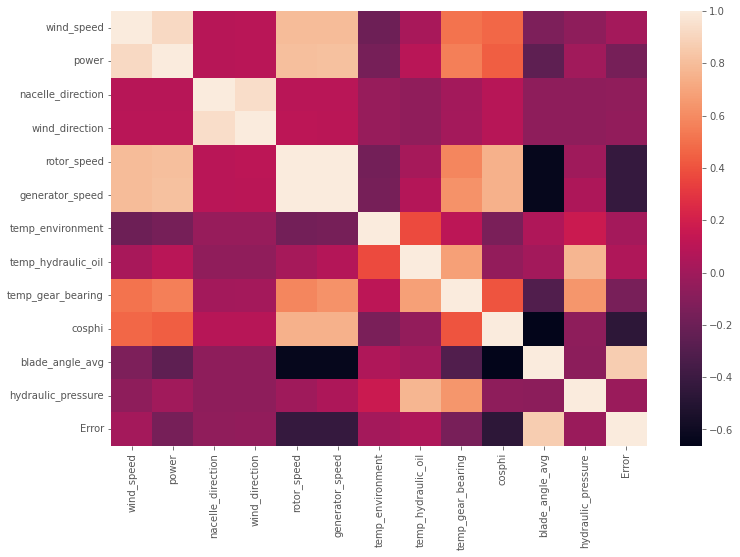

In [51]:
num_attribs=['measured_at', 'wind_speed', 'power',
       'nacelle_direction', 'wind_direction', 'rotor_speed', 'generator_speed',
       'temp_environment', 'temp_hydraulic_oil', 'temp_gear_bearing', 'cosphi',
       'blade_angle_avg', 'hydraulic_pressure']
cat_attribs=["park_id","turbine_id"]
fig, ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(data=data[num_attribs+["Error"]].corr())

Again, we see that "rotor_speed" and "generator_speed" are highly correlated with each other. Therefore, we can merge them later to one feature. Similarly, "wind_direction" and "nacelle_direction" are highly correlated with each other, and we can also merge them later to one feature. 

It is also interesting to see whether there are more or less errors depending on which turbine, and which wind park we choose. Here we check this:

In [52]:
pd.crosstab(index=y_train,columns=X_train.turbine_id,normalize="columns",margins=True)

turbine_id        11        12        13        14       21        22  \
Error                                                                   
False       0.970235  0.955564  0.968538  0.967141  0.89389  0.884473   
True        0.029765  0.044436  0.031462  0.032859  0.10611  0.115527   

turbine_id        23        24        25      26        27        28       29  \
Error                                                                           
False       0.868716  0.905916  0.924596  0.9834  0.949561  0.948167  0.94013   
True        0.131284  0.094084  0.075404  0.0166  0.050439  0.051833  0.05987   

turbine_id       All  
Error                 
False       0.930821  
True        0.069179

In [53]:
pd.crosstab(index=y_train,columns=X_train.park_id,normalize="columns",margins=True)

park_id         1         2       All
Error                                
False    0.965371  0.921978  0.930821
True     0.034629  0.078022  0.069179

We see that for some turbines, for example turbine 22, the error rate is much higher than for others, for example for turbine 11. Also we see that there is a difference depending on in which windpark the turbine is - the error rate is much higher in the second windpark than in the first.

Next, we would like to see if there is any beneficial information in the temporal structure of the data. For this we take the "measured at" feature and use it to generate new features, e.g. the month and week of the observed data entry:

In [57]:
import datetime as dt
X_train["measured_at"]=pd.to_datetime(X_train.measured_at) 
X_train["month"]=X_train.measured_at.dt.month
X_train["week"]=data.measured_at.dt.isocalendar().week
data["measured_at"]=pd.to_datetime(data.measured_at) 
data["month"]=data.measured_at.dt.month
data["week"]=data.measured_at.dt.isocalendar().week

/var/folders/bp/b3w30d6x0s34qhd5jr44g6500000gn/T/ipykernel_48724/3006906232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["measured_at"]=pd.to_datetime(X_train.measured_at)
/var/folders/bp/b3w30d6x0s34qhd5jr44g6500000gn/T/ipykernel_48724/3006906232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["month"]=X_train.measured_at.dt.month
/var/folders/bp/b3w30d6x0s34qhd5jr44g6500000gn/T/ipykernel_48724/3006906232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

Is there a relationship between the error and the month of the observations? For this, we look at both windparks separately. 

Text(0.5, 1.0, 'Error percentage by month for windpark 1')

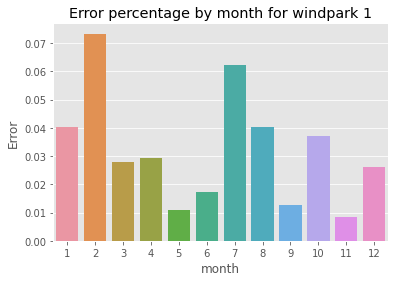

In [64]:
sns.barplot(data=data[data.park_id==1], y="Error",x="month",ci=None)
plt.title("Error percentage by month for windpark 1")

Text(0.5, 1.0, 'Error percentage by month for windpark 2')

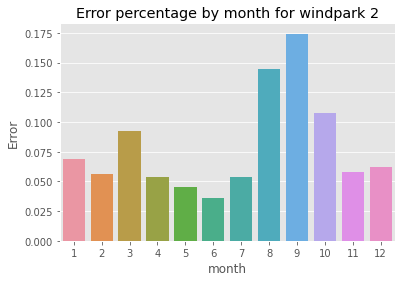

In [69]:
sns.barplot(data=data[data.park_id==2], y="Error",x="month",ci=None)
plt.title("Error percentage by month for windpark 2")

Indee, for the first windpark we observe here a lot of errors in February, for the second windpark a lot of errors in August and September.

We can create a new feature, that contains both the information of which windpark the data comes from, as well as that contains two months instead of just one month as a time period. 

In [70]:
data["bimonth"]=data.month// 2 
X_train["bimonth"]=X_train.month // 2 
X_train["bimonthpark"]= list(zip(X_train.bimonth, X_train.park_id))
X_train["Error"]=data.Error

/var/folders/bp/b3w30d6x0s34qhd5jr44g6500000gn/T/ipykernel_48724/1471017695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["bimonth"]=X_train.month // 2
/var/folders/bp/b3w30d6x0s34qhd5jr44g6500000gn/T/ipykernel_48724/1471017695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["bimonthpark"]= list(zip(X_train.bimonth, X_train.park_id))


Text(0.5, 1.0, 'Error percentage by bimonth for both parks by bimonth')

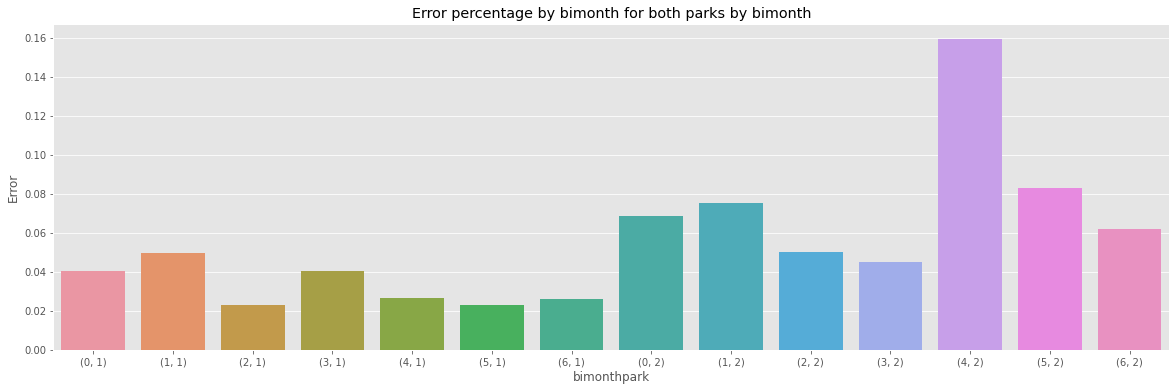

In [71]:
fig, ax=plt.subplots(1,1,figsize=(20,6))
sns.barplot(data=X_train, y="Error",x="bimonthpark",ci=None)
plt.title("Error percentage by bimonth for both parks by bimonth")

This seems to be a promising feature: The error changes significantly depending on the value of this feature.